# Launch Montitors
Launch monitors can measure a variety of parameters, including:

- Ball Speed: The speed of the golf ball immediately after impact.
- Launch Angle: The angle at which the ball leaves the clubface relative to the ground.
- Spin Rate: The rate at which the ball spins around its axis.
- Carry Distance: The distance the ball travels through the air before hitting the ground.
- Total Distance: The total distance the ball travels, including roll.
- Club Speed: The speed of the clubhead at impact.
- Smash Factor: The ratio of ball speed to club speed, indicating the efficiency of the impact.

# Calcs
- MPH to MPS: 1 mph = 1/2.2375 = 0.44704 m/s
- Total Spin: total spin * math(cos(math.radians(spin_axis)))



# Calculations
- [What A Drag - Projectile Motion with Drag in Excel](https://www.youtube.com/watch?v=ShWSK1YF61Q)
- https://www.youtube.com/watch?v=k_ttiagCNUQ
- https://golfcalculate.com/golf-ball-distance-calculator/

`distance = (initial_velocity^2 * sin(2 * launch_angle)) / gravity`

launch_angle has to be represented in radians in most tech including Excel and Python

# Terms
|Detail|Value|Example|
|--|--|--|
rho|kg/m^3 (standard air density at sea level)|1.225
m|mass (kg)|0.045
A|Area (m^2)|0.00138
g|Gravity|9.80665
Cd|Coefficient of drag|0.45 smooth and 0.2 for dimpled

Coefficient of drag (Cd)
- Smooth golf ball: Cd ≈ 0.45 - 0.5
- Dimpled golf ball: Cd ≈ 0.2 - 0.3
    - Travel up to 30m more


# Excel
|Detail|Value|
|--|--|
Velocity (mph)|150
Velocity (mps)|=B1/2.23694
Velocity (m/s)|=B1*.44704

Estimated Distances for clubs:
- Driver: Distance = Swing Speed (mph) * 2.5
- Wood: Distance = Swing Speed (mph) * 2.2
- Iron: Distance = Swing Speed (mph) * 1.8
- Wedge: Distance = Swing Speed (mph) * 1.2


B1=velocity in MPH
B2=velocity in MPS (=B1/2.23694)
B3=Launch Angle (Degrees)
B4=Launch Angle (Radians) (=RADIANS(B3))

In [42]:
import math
import numpy
import matplotlib.pyplot as pyplot

# Constants
MPS_TO_MPH = 2.23694
GRAVITATIONAL_ACCELERATION = 9.80665
METERS_TO_YARDS = 1.09361
DRAG_COEFFICIENT = 0.7

# Functions

## Copilot Versions

In [110]:
def calculate_golf_ball_distance(ball_speed, launch_angle):
    """
    Calculate the distance a golf ball travels given the ball speed, launch angle, and spin rate.

    Parameters:
    ball_speed (float): The speed of the golf ball in meters per second.
    launch_angle (float): The launch angle of the golf ball in degrees.

    Returns:
    float: The distance the golf ball travels in meters.
    """
    # Convert launch angle from degrees to radians
    launch_angle_rad = math.radians(launch_angle)
    
    # Acceleration due to gravity (m/s^2)
    g = 9.81
    
    # Simplified calculation of distance (ignoring spin rate for simplicity)
    distance_meters = (ball_speed ** 2) * math.sin(2 * launch_angle_rad) / g
    
    return distance_meters

def calculate_golf_ball_distance_advanced(initial_velocity, launch_angle, spin_rate, altitude=0, temperature=20, humidity=50):
    """
    Calculate the distance a golf ball travels given the initial velocity, launch angle, and spin rate.

    Parameters:
    initial_velocity (float): The initial velocity of the golf ball in meters per second.
    launch_angle (float): The launch angle of the golf ball in degrees.
    spin_rate (float): The spin rate of the golf ball in revolutions per minute (RPM).
    altitude (float): The altitude in meters (default is 0).
    temperature (float): The temperature in degrees Celsius (default is 20).
    humidity (float): The relative humidity in percentage (default is 50).

    Returns:
    float: The distance the golf ball travels in yards.
    """
    # Convert launch angle from degrees to radians
    launch_angle_rad = math.radians(launch_angle)
    
    # Acceleration due to gravity (m/s^2)
    g = 9.81
    
    # Convert spin rate from RPM to radians per second
    spin_rate_rad = spin_rate * 2 * math.pi / 60
    
    # Air density (kg/m^3) - simplified model
    air_density = 1.225 * (1 - 0.0000225577 * altitude) * (273 / (273 + temperature)) * (1 - 0.378 * humidity / 100)
    
    # Drag coefficient (simplified model)
    drag_coefficient = 0.3
    
    # Lift coefficient (simplified model)
    lift_coefficient = 0.2 * spin_rate_rad / initial_velocity
    
    # Calculate the drag and lift forces
    drag_force = 0.5 * air_density * drag_coefficient * initial_velocity**2
    lift_force = 0.5 * air_density * lift_coefficient * initial_velocity**2
    
    # Calculate the effective acceleration due to drag and lift
    effective_acceleration = g - (lift_force / initial_velocity) + (drag_force / initial_velocity)
    
    # Calculate the range using the projectile motion formula with effective acceleration
    distance_meters = (initial_velocity ** 2) * math.sin(2 * launch_angle_rad) / effective_acceleration
    
    return distance_meters

def calculate_golf_ball_distance_with_side_spin(ball_speed, launch_angle, back_spin, side_spin, altitude=0, temperature=20, humidity=50):
    """
    Calculate the distance a golf ball travels given the ball speed, launch angle, back spin, and side spin.

    Parameters:
    ball_speed (float): The speed of the golf ball in meters per second.
    launch_angle (float): The launch angle of the golf ball in degrees.
    back_spin (float): The back spin of the golf ball in revolutions per minute (RPM).
    side_spin (float): The side spin of the golf ball in revolutions per minute (RPM).
    altitude (float): The altitude in meters (default is 0).
    temperature (float): The temperature in degrees Celsius (default is 20).
    humidity (float): The relative humidity in percentage (default is 50).

    Returns:
    float: The distance the golf ball travels in meters.
    """
    # Convert launch angle from degrees to radians
    launch_angle_rad = math.radians(launch_angle)
    
    # Acceleration due to gravity (m/s^2)
    g = 9.81
    
    # Convert spin rates from RPM to radians per second
    back_spin_rad = back_spin * 2 * math.pi / 60
    side_spin_rad = side_spin * 2 * math.pi / 60
    
    # Air density (kg/m^3) - simplified model
    air_density = 1.225 * (1 - 0.0000225577 * altitude) * (273 / (273 + temperature)) * (1 - 0.378 * humidity / 100)
    
    # Drag coefficient (simplified model)
    drag_coefficient = 0.3
    
    # Lift coefficient (simplified model)
    lift_coefficient = 0.2 * back_spin_rad / ball_speed
    
    # Side force coefficient (simplified model)
    side_force_coefficient = 0.2 * side_spin_rad / ball_speed
    
    # Calculate the drag, lift, and side forces
    drag_force = 0.5 * air_density * drag_coefficient * ball_speed**2
    lift_force = 0.5 * air_density * lift_coefficient * ball_speed**2
    side_force = 0.5 * air_density * side_force_coefficient * ball_speed**2
    
    # Calculate the effective acceleration due to drag, lift, and side forces
    effective_acceleration = g - (lift_force / ball_speed) + (drag_force / ball_speed)
    
    # Calculate the range using the projectile motion formula with effective acceleration
    distance_meters = (ball_speed ** 2) * math.sin(2 * launch_angle_rad) / effective_acceleration
    
    # Ensure the distance is positive
    distance_meters = abs(distance_meters)
    
    # Adjust distance for side spin (simplified model)
    distance_meters -= side_force / g
    
    return distance_meters

def calculate_golf_ball_distance_with_spin_axis(ball_speed, launch_angle, spin_rate, spin_axis, altitude=0, temperature=20, humidity=50):
    """
    Calculate the distance a golf ball travels given the ball speed, launch angle, spin rate, and spin axis.

    Parameters:
    ball_speed (float): The speed of the golf ball in meters per second.
    launch_angle (float): The launch angle of the golf ball in degrees.
    spin_rate (float): The total spin rate of the golf ball in revolutions per minute (RPM).
    spin_axis (float): The spin axis angle in degrees (negative to left, positive to right).
    altitude (float): The altitude in meters (default is 0).
    temperature (float): The temperature in degrees Celsius (default is 20).
    humidity (float): The relative humidity in percentage (default is 50).

    Returns:
    float: The distance the golf ball travels in meters.
    """
    # Convert launch angle and spin axis from degrees to radians
    launch_angle_rad = math.radians(launch_angle)
    spin_axis_rad = math.radians(spin_axis)
    
    # Acceleration due to gravity (m/s^2)
    g = 9.81
    
    # Convert spin rate from RPM to radians per second
    spin_rate_rad = spin_rate * 2 * math.pi / 60
    
    # Decompose spin rate into backspin and sidespin components
    back_spin_rad = spin_rate_rad * math.cos(spin_axis_rad)
    side_spin_rad = spin_rate_rad * math.sin(spin_axis_rad)
    
    # Air density (kg/m^3) - simplified model
    air_density = 1.225 * (1 - 0.0000225577 * altitude) * (273 / (273 + temperature)) * (1 - 0.378 * humidity / 100)
    
    # Drag coefficient (simplified model)
    drag_coefficient = 0.3
    
    # Lift coefficient (simplified model)
    lift_coefficient = 0.2 * back_spin_rad / ball_speed
    
    # Side force coefficient (simplified model)
    side_force_coefficient = 0.2 * side_spin_rad / ball_speed
    
    # Calculate the drag, lift, and side forces
    drag_force = 0.5 * air_density * drag_coefficient * ball_speed**2
    lift_force = 0.5 * air_density * lift_coefficient * ball_speed**2
    side_force = 0.5 * air_density * side_force_coefficient * ball_speed**2
    
    # Calculate the effective acceleration due to drag, lift, and side forces
    effective_acceleration = g - (lift_force / ball_speed) + (drag_force / ball_speed)
    
    # Calculate the range using the projectile motion formula with effective acceleration
    distance_meters = (ball_speed ** 2) * math.sin(2 * launch_angle_rad) / effective_acceleration
    
    # Ensure the distance is positive
    distance_meters = abs(distance_meters)
    
    # Adjust distance for side spin (simplified model)
    distance_meters -= side_force / g

    return distance_meters

def calculate_golf_ball_distance_with_launch_direction(ball_speed, launch_angle, spin_rate, spin_axis, launch_direction, altitude=0, temperature=20, humidity=50):
    """
    Calculate the distance a golf ball travels given the ball speed, launch angle, spin rate, spin axis, and launch direction.

    Parameters:
    ball_speed (float): The speed of the golf ball in meters per second.
    launch_angle (float): The launch angle of the golf ball in degrees.
    spin_rate (float): The total spin rate of the golf ball in revolutions per minute (RPM).
    spin_axis (float): The spin axis angle in degrees (negative to left, positive to right).
    launch_direction (float): The horizontal launch direction angle in degrees (negative to left, positive to right).
    altitude (float): The altitude in meters (default is 0).
    temperature (float): The temperature in degrees Celsius (default is 20).
    humidity (float): The relative humidity in percentage (default is 50).

    Returns:
    float: The distance the golf ball travels in meters.
    """
    # Convert angles from degrees to radians
    launch_angle_rad = math.radians(launch_angle)
    spin_axis_rad = math.radians(spin_axis)
    launch_direction_rad = math.radians(launch_direction)
    
    # Acceleration due to gravity (m/s^2)
    g = 9.81
    
    # Convert spin rate from RPM to radians per second
    spin_rate_rad = spin_rate * 2 * math.pi / 60
    
    # Decompose spin rate into backspin and sidespin components
    back_spin_rad = spin_rate_rad * math.cos(spin_axis_rad)
    side_spin_rad = spin_rate_rad * math.sin(spin_axis_rad)
    
    # Air density (kg/m^3) - simplified model
    air_density = 1.225 * (1 - 0.0000225577 * altitude) * (273 / (273 + temperature)) * (1 - 0.378 * humidity / 100)
    
    # Drag coefficient (simplified model)
    drag_coefficient = 0.3
    
    # Lift coefficient (simplified model)
    lift_coefficient = 0.2 * back_spin_rad / ball_speed
    
    # Side force coefficient (simplified model)
    side_force_coefficient = 0.2 * side_spin_rad / ball_speed
    
    # Calculate the drag, lift, and side forces
    drag_force = 0.5 * air_density * drag_coefficient * ball_speed**2
    lift_force = 0.5 * air_density * lift_coefficient * ball_speed**2
    side_force = 0.5 * air_density * side_force_coefficient * ball_speed**2
    
    # Calculate the effective acceleration due to drag, lift, and side forces
    effective_acceleration = g - (lift_force / ball_speed) + (drag_force / ball_speed)
    
    # Decompose initial velocity into horizontal and vertical components
    initial_velocity_x = ball_speed * math.cos(launch_angle_rad) * math.cos(launch_direction_rad)
    initial_velocity_y = ball_speed * math.sin(launch_angle_rad)
    initial_velocity_z = ball_speed * math.cos(launch_angle_rad) * math.sin(launch_direction_rad)
    
    # Calculate the range using the projectile motion formula with effective acceleration
    distance_meters = (initial_velocity_x ** 2) * math.sin(2 * launch_angle_rad) / effective_acceleration
    
    # Ensure the distance is positive
    distance_meters = abs(distance_meters)
    
    # Adjust distance for side spin (simplified model)
    distance_meters -= side_force / g

    return distance_meters

def calculate_air_density(elevation_ft, temperature_c=15):
    """
    Calculate the air density at a given elevation.

    Parameters:
    elevation_ft (float): The elevation in feet.
    temperature_c (float): The temperature in degrees Celsius (default is 15°C).

    Returns:
    float: The air density in kg/m^3.
    """
    # Convert elevation from feet to meters
    elevation_m = elevation_ft * 0.3048
    
    # Constants
    T0 = 288.15  # Standard temperature at sea level in Kelvin
    P0 = 101325  # Standard pressure at sea level in Pascals
    g = 9.80665  # Gravitational acceleration in m/s^2
    R = 287.05  # Specific gas constant for dry air in J/(kg·K)
    L = 0.0065  # Temperature lapse rate in K/m
    
    # Convert temperature from Celsius to Kelvin
    temperature_k = temperature_c + 273.15
    
    # Calculate the pressure at the given elevation using the barometric formula
    pressure = P0 * (1 - (L * elevation_m) / T0) ** (g / (R * L))
    
    # Calculate the air density using the ideal gas law
    air_density = pressure / (R * temperature_k)
    
    return air_density

def calculate_ball_speed(distance_meters, launch_angle):
    """
    Calculate the initial velocity (ball speed) given the distance in meters and launch angle.

    Parameters:
    distance_meters (float): The distance the golf ball travels in meters.
    launch_angle (float): The launch angle of the golf ball in degrees.

    Returns:
    float: The initial velocity (ball speed) in meters per second.
    """
    # Convert launch angle from degrees to radians
    launch_angle_rad = math.radians(launch_angle)
    
    # Acceleration due to gravity (m/s^2)
    g = 9.81
    
    # Calculate the initial velocity using the rearranged projectile motion formula
    initial_velocity = math.sqrt(distance_meters * g / math.sin(2 * launch_angle_rad))
    
    return initial_velocity

def calculate_side_carry(ball_speed, launch_angle, spin_rate_rpm, launch_direction, spin_axis):
    # Constants
    g = 9.81  # Gravity (m/s^2)
    air_density = 1.225  # Air density (kg/m^3)
    ball_mass = 0.04593  # Golf ball mass (kg)
    ball_diameter = 0.04267  # Golf ball diameter (m)
    ball_area = math.pi * (ball_diameter / 2)**2  # Cross-sectional area (m^2)
    Cd = 0.2  # Drag coefficient (assumed constant for simplicity)
    Cl = 0.1  # Lift coefficient (assumed constant for simplicity)

    # Convert angles to radians
    launch_angle_rad = math.radians(launch_angle)
    launch_direction_rad = math.radians(launch_direction)
    spin_axis_rad = math.radians(spin_axis)

    # Initial velocities
    Vx = ball_speed * math.cos(launch_angle_rad) * math.cos(launch_direction_rad)
    Vy = ball_speed * math.sin(launch_angle_rad)
    Vz = ball_speed * math.cos(launch_angle_rad) * math.sin(launch_direction_rad)

    # Spin rate in rad/s
    spin_rate = spin_rate_rpm * 2 * math.pi / 60

    # Time step for integration
    dt = 0.01
    t = 0
    side_carry = 0

    # Integrate the lateral force over the flight time
    while Vy > 0:
        # Calculate the lateral force
        lateral_force = 0.5 * air_density * ball_area * Cl * spin_rate * Vz

        # Update velocities
        Vx -= 0.5 * air_density * ball_area * Cd * Vx**2 / ball_mass * dt
        Vy -= g * dt
        Vz -= lateral_force / ball_mass * dt

        # Update side carry
        side_carry += Vz * dt

        # Update time
        t += dt

    return side_carry

def run_test(ball_speed_mph,launch_angle,spin_rate_rpm,launch_direction,spin_axis):
    ball_speed = ball_speed_mph / MPS_TO_MPH  # Convert to meters per second

    distance = calculate_golf_ball_distance(ball_speed, launch_angle)

    print(f"Simple: {distance:.2f} meters.")

    # Example usage
    distance = calculate_golf_ball_distance_advanced(ball_speed, launch_angle, spin_rate_rpm)
    print(f"With Spin RPM: {distance:.2f} meters.")

    distance = calculate_golf_ball_distance_with_spin_axis(ball_speed, launch_angle, spin_rate_rpm, spin_axis)
    print(f"With Spin RPM and Axis: {distance:.2f} meters.")

    distance = calculate_golf_ball_distance_with_launch_direction(ball_speed, launch_angle, spin_rate_rpm, spin_axis, launch_direction)
    print(f"With Spin RPM, Axis and Launch Direction: {distance:.2f} meters.")

    side_carry = calculate_side_carry(ball_speed, launch_angle, spin_rate_rpm, launch_direction, spin_axis)
    print(f"Side Carry: {side_carry:.2f} meters.")



## Example from GitHub Python
- https://jrhodes95.github.io/Physics-in-Sport-Site/pythonmodel.html


In [49]:
def simpleTrajectory(initial_velocity, launch_angle_degrees):
    
    '''define the value for the acceleration due to gravity'''
    g = 9.81
    
    '''convert the angle to radians'''
    theta_rad = numpy.radians(launch_angle_degrees)
  
    '''use the angle to find the components of initial velocity'''
    u_x = initial_velocity * numpy.cos(theta_rad)
    u_y = initial_velocity * numpy.sin(theta_rad)
    
    '''find the time when the ball will hit the floor'''
    t_end = (2 * u_y) / g  
    
    '''create an array of points to sample'''
    t = numpy.linspace(0, t_end, 30)

    '''find the x, y, and z co-ordinates at each point'''
    s_x = u_x * t
    s_y = u_y * t - 0.5 * g * t ** 2
    
    '''return the output arrays of points'''
    return s_x, s_y

def forceDrag(rho, v, C_D, area):
    
    force = - 0.5 * rho * v ** 2 * C_D * area
    
    return force

def dragTrajectory(u, theta_deg, C_D):
    
    '''initialise variables'''
    interval = 0.01
    g = - 9.81
    rho = 1.225
    area = 0.00138
    
    '''convert angles to radians'''
    theta_rad = numpy.radians(theta_deg)
    
    s_x = 0
    s_y = 0
    
    v_x = u * numpy.cos(theta_rad)
    v_y = u * numpy.sin(theta_rad)
    
    
    '''mass in kg'''
    m = 0.045
    
    a_x = forceDrag(rho, v_x, C_D, area)/m
    a_y = (forceDrag(rho, v_y, C_D, area) )/m +g

    
    '''intialise arrays'''
    x_array = numpy.array([0])
    y_array = numpy.array([0])
    t_array = numpy.array([0])
    
    count = 0 
    
    while s_y >= 0:
        
        count = count + 1
        time = count * interval
        
        '''find the next point's position '''
        s_x = s_x + v_x * interval + 0.5 * a_x * interval ** 2
        s_y = s_y + v_y * interval + 0.5 * a_y * interval ** 2
        
        '''find the new velocity at the next point'''
        v_x = v_x + a_x * interval
        v_y = v_y + a_y * interval
        
        '''find the new acceleration'''
        a_x = forceDrag(rho, v_x, C_D, area)/m
        a_y = (forceDrag(rho, v_y, C_D, area) )/m +g
        
        '''append data to arrays'''
        x_array = numpy.append(x_array, s_x)
        y_array = numpy.append(y_array, s_y)
        t_array = numpy.append(t_array, time)
        
    return x_array, y_array, t_array
def liftTrajectory(u, theta_deg, C_D, spin_RPM):
    
    '''initialise variables'''
    interval = 0.01
    g = - 9.81
    rho = 1.225
    area = 0.00138
    
    '''convert angles to radians'''
    theta_rad = numpy.radians(theta_deg)
    
    '''find the magnitude of the lift force'''
    lift_mag = 0.285 * (1-numpy.exp(-0.00026*spin_RPM))
    
    
    
    s_x = 0
    s_y = 0
    
    v_x = u * numpy.cos(theta_rad)
    v_y = u * numpy.sin(theta_rad)
    
    
    '''mass in kg'''
    m = 0.045
    
    a_x = forceDrag(rho, v_x, C_D, area)/m
    a_y = (forceDrag(rho, v_y, C_D, area) )/m +g 

    
    '''intialise arrays'''
    x_array = numpy.array([0])
    y_array = numpy.array([0])
    t_array = numpy.array([0])
    
    count = 0 
    
    while s_y >= 0:
        
        count = count + 1
        time = count * interval
        
        '''find the next point's position '''
        s_x = s_x + v_x * interval + 0.5 * a_x * interval ** 2
        s_y = s_y + v_y * interval + 0.5 * a_y * interval ** 2
        
        '''find the new velocity at the next point'''
        v_x = v_x + a_x * interval
        v_y = v_y + a_y * interval
        
        '''find the components of lift'''
        theta_i = numpy.arctan(v_y/v_x)
        l_x = lift_mag * numpy.sin(theta_i)
        l_y = lift_mag * numpy.cos(theta_i)
        
        '''find the new acceleration'''
        a_x = forceDrag(rho, v_x, C_D, area)/m + l_x/m
        a_y = (forceDrag(rho, v_y, C_D, area) )/m +g +l_y/m
        
        '''append data to arrays'''
        x_array = numpy.append(x_array, s_x)
        y_array = numpy.append(y_array, s_y)
        t_array = numpy.append(t_array, time)
        
    return x_array, y_array, t_array

In [76]:
def calc_golf_carry_distance(v0, launch_angle):
    '''
    https://www.mycompiler.io/view/3Ta6UVuc0pY
    Calculate the distance a golf ball travels given the initial velocity and launch angle.
    '''
    
    theta = launch_angle
    m = 0.04593  # kg
    A = 0.0043  # m^2
    Cd = 0.3
    Cl = 0.4
    g = 9.8  # m/s^2
    rho = 1.225  # kg/m^3 (standard air density at sea level)

    # Convert angle to radians
    theta_rad = math.radians(theta)

    # Calculate D
    D = (v0**2 * math.sin(2 * theta_rad)) / g + (2 * v0**2 / g) * (m / (rho * A * Cd))**0.5 * math.atan(math.sin(theta_rad) / (math.cos(theta_rad) + (2 * v0 / g) * (m / (rho * A * Cl))**0.5))

    return D
    # # Convert distance from meters to yards
    # distance_yards = D * 1.09361
    # print(f"The total distance traveled by the golf ball is approximately {distance_yards:.2f} yards.")

# Examples

In [131]:
def print_detail(ball_speed, launch_angle, spin_rate_rpm, launch_direction=None, spin_axis=None,carry_distance=None):
    """
    To test the golf ball trajectory calculations and visualize the results, we can use the provided functions and plot the trajectories. Below is a detailed example that demonstrates how to calculate and plot the trajectories with and without drag, as well as with spin.

    Parameters:
    ball_speed (float): The speed of the golf ball in meters per second.
    launch_angle (float): The launch angle of the golf ball in degrees.
    spin_rate_rpm (float): The spin rate of the golf ball in revolutions per minute (RPM).
    launch_direction (float, optional): The horizontal launch direction angle in degrees (negative to left, positive to right).
    spin_axis (float, optional): The spin axis angle in degrees (negative to left, positive to right).
    carry_distance (float, optional): The carry distance of the golf ball in meters.
    """

    CD_smooth = 0.45
    CD_dimpled = 0.2

    back_spin=None

    print(f"Ball Speed: {ball_speed:.2f} (meters per second)")
    print(f"Vertical Launch Angle: {launch_angle:.2f} (degrees)")
    print(f"Spin Rate: {spin_rate_rpm:.2f} (RPM)")
    if launch_direction is not None:
        print(f"Launch Direction: {launch_angle:.2f} (degrees)")
    if spin_axis is not None:
        print(f"Spin Axis: {spin_axis:.2f} (degrees)")
        back_spin=round(spin_rate_rpm*math.cos(math.radians(spin_axis)))

    if carry_distance is not None:
        print(f"Carry Distance: {carry_distance:.2f} (meters)")

    Vo=math.radians(launch_angle)
    # Same thing
    # Vo=launch_angle * (math.pi / 180)
    # print(math.radians(launch_angle))
    # print(launch_angle * (math.pi / 180))    

    Vox=ball_speed*math.cos(Vo)
    print("Vox: ", Vox)

    Voy=ball_speed*math.sin(Vo)
    print("Voy: ", Voy)

    # Calculate the time of flight
    time_of_flight = (2 * Voy) / GRAVITATIONAL_ACCELERATION
    print("Time of flight: ", time_of_flight, "seconds")

    # Calculate the horizontal distance traveled
    horizontal_distance = Vox * time_of_flight

    # Calculate the distance traveled without time
    distance_meters = (ball_speed ** 2) * math.sin(2 * Vo) / GRAVITATIONAL_ACCELERATION

    x_values,y_values = simpleTrajectory(ball_speed, launch_angle)

    print("Distance calcs:")
    print("- Horizontal distance: ", horizontal_distance)
    print("- Distance meters: ", distance_meters)
    print("- Simple Trajectory: ", x_values[-1])

    # Check if the calculated distances are close
    assert math.isclose(horizontal_distance, distance_meters, rel_tol=1e-9)
    assert math.isclose(x_values[-1], distance_meters, rel_tol=1e-2)


    x_values_drag_smooth,y_values_drag_smooth,_ = dragTrajectory(ball_speed, launch_angle, CD_smooth)
    x_values_drag_dimpled,y_values_drag_dimpled,_ = dragTrajectory(ball_speed, launch_angle, CD_dimpled)
    x_values_lift_dimpled,y_values_lift_dimpled,_ = liftTrajectory(ball_speed, launch_angle, CD_dimpled, spin_rate_rpm)


    pyplot.plot(x_values, y_values, 'yo--',label='no drag')
    pyplot.plot(x_values_drag_smooth, y_values_drag_smooth, 'b',label='smooth')
    pyplot.plot(x_values_drag_dimpled, y_values_drag_dimpled, 'g',label='dimpled ball with drag')
    pyplot.plot(x_values_lift_dimpled, y_values_lift_dimpled, 'm',label='dimpled ball with drag and spin')
    if back_spin is not None:
        x_values_lift_dimpled_back,y_values_lift_dimpled_back,_ = liftTrajectory(ball_speed, launch_angle, CD_dimpled, back_spin)

    pyplot.xlabel('Distance travelled (m)')
    pyplot.ylabel('Height of the ball (m)')
    pyplot.title('Simple trajectory model with and without drag')
    pyplot.legend()
    pyplot.show()

    print(f"simpleTrajectory: {x_values[-1]:.2f} m")
    print(f"dragTrajectory smooth : {x_values_drag_smooth[-1]:.2f} m {x_values_drag_smooth[-1]*METERS_TO_YARDS:.2f} yards")
    print(f"dragTrajectory dimpled : {x_values_drag_dimpled[-1]:.2f} m {x_values_drag_dimpled[-1]*METERS_TO_YARDS:.2f} yards")
    print(f"liftTrajectory dimpled with spin : {x_values_lift_dimpled[-1]:.2f} m {x_values_lift_dimpled[-1]*METERS_TO_YARDS:.2f} yards")
    if back_spin is not None:
        print(f"liftTrajectory dimpled with back spin : {x_values_lift_dimpled_back[-1]:.2f} m {x_values_lift_dimpled_back[-1]*METERS_TO_YARDS:.2f} yards")


    distance_with_air = calc_golf_carry_distance(ball_speed, launch_angle)
    print(f"calc_golf_carry_distance {distance_with_air:.2f} meters.")

    # Reverse calc the distance
    ball_speed_calc = calculate_ball_speed(distance_meters, launch_angle)
    print(f"calculate_ball_speed {ball_speed_calc:.2f} meters per second.")

    # assert if > 1% difference
    assert math.isclose(ball_speed, ball_speed_calc, rel_tol=1e-2)


    # Copilot Function tests
    distance = calculate_golf_ball_distance(ball_speed, launch_angle)
    print(f"calculate_golf_ball_distance: {distance:.2f} m")

    # Example usage
    distance = calculate_golf_ball_distance_advanced(ball_speed, launch_angle, spin_rate_rpm)
    print(f"calculate_golf_ball_distance_advanced: {distance:.2f} m.")

    if spin_axis is not None:
        distance = calculate_golf_ball_distance_with_spin_axis(ball_speed, launch_angle, spin_rate_rpm, spin_axis)
        print(f"calculate_golf_ball_distance_with_spin_axis: {distance:.2f} m")

        if launch_direction is not None:
            distance = calculate_golf_ball_distance_with_launch_direction(ball_speed, launch_angle, spin_rate_rpm, spin_axis, launch_direction)
            print(f"calculate_golf_ball_distance_with_launch_direction: {distance:.2f} m.")    

            side_carry = calculate_side_carry(ball_speed, launch_angle, spin_rate_rpm, launch_direction, spin_axis)
            print(f"calculate_side_carry: {side_carry:.2f} meters {side_carry*METERS_TO_YARDS:.2f} yards")

Ball Speed: 63.03 (meters per second)
Vertical Launch Angle: 25.00 (degrees)
Spin Rate: 3000.00 (RPM)
Vox:  57.12687777596522
Voy:  26.638700593417177
Time of flight:  5.432782977554451 seconds
Distance calcs:
- Horizontal distance:  310.35792914209753
- Distance meters:  310.3579291420975
- Simple Trajectory:  310.2519455475382


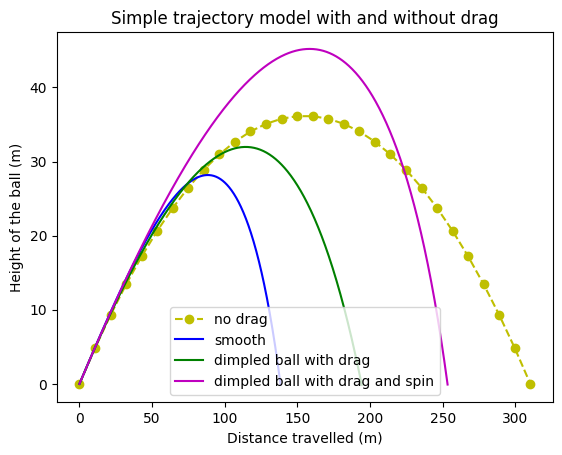

Distance travelled by ball with no drag : 310.25 m
dragTrajectory smooth : 138.38 m
dragTrajectory dimpled : 194.24 m
liftTrajectory dimpled with spin : 253.30 m 277.01 yards
calc_golf_carry_distance 340.87 meters.
calculate_ball_speed 63.04 meters per second.
calculate_golf_ball_distance: 283.70 m
calculate_golf_ball_distance_advanced: -264.59 m.


In [109]:
print_detail(141/MPS_TO_MPH, 25, 3000)

Ball Speed: 63.48 (meters per second)
Vertical Launch Angle: 18.90 (degrees)
Spin Rate: 1088.00 (RPM)
Launch Direction: 18.90 (degrees)
Spin Axis: -5.00 (degrees)
Carry Distance: 224.12 (meters)
Vox:  60.05709628041495
Voy:  20.562139969841486
Time of flight:  4.192077465818855 seconds
Distance calcs:
- Horizontal distance:  251.7639999796409
- Distance meters:  251.76399997964086
- Simple Trajectory:  251.76399997964091


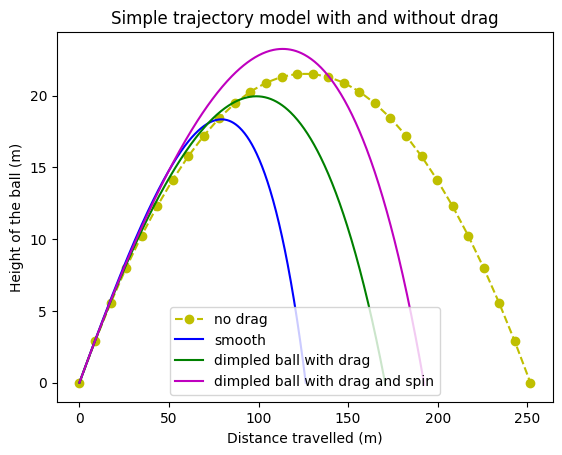

simpleTrajectory: 251.76 m
dragTrajectory smooth : 126.35 m 138.18 yards
dragTrajectory dimpled : 170.80 m 186.79 yards
liftTrajectory dimpled with spin : 192.55 m 210.57 yards
liftTrajectory dimpled with back spin : 192.26 m 210.25 yards
calc_golf_carry_distance 275.40 meters.
calculate_ball_speed 63.48 meters per second.
calculate_golf_ball_distance: 251.76 m
calculate_golf_ball_distance_advanced: 305.76 m.
calculate_golf_ball_distance_with_spin_axis: 310.20 m
calculate_golf_ball_distance_with_launch_direction: 276.52 m.
calculate_side_carry: 8.11 meters 8.87 yards


In [132]:
# Carry 245.1 and Total was 263.7
print_detail(142/MPS_TO_MPH, 18.9, 1088,4.6,-5,245.1/METERS_TO_YARDS)

Ball Speed: 60.00 (meters per second)
Vertical Launch Angle: 15.00 (degrees)
Spin Rate: 3275.00 (RPM)
Vox:  57.9555495773441
Voy:  15.529142706151244
Time of flight:  3.1670637182220727 seconds
Distance calcs:
- Horizontal distance:  183.54891833602707
- Distance meters:  183.54891833602707
- Simple Trajectory:  183.48623853211012


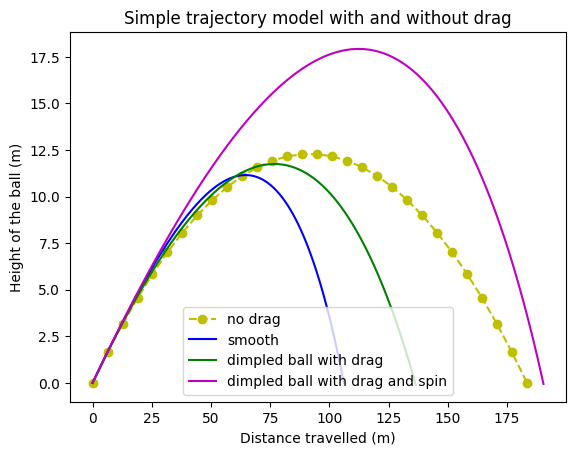

simpleTrajectory: 183.49 m
dragTrajectory smooth : 106.12 m
dragTrajectory dimpled : 136.55 m
liftTrajectory dimpled with spin : 190.45 m 208.28 yards
calc_golf_carry_distance 201.31 meters.
calculate_ball_speed 60.01 meters per second.
calculate_golf_ball_distance: 183.49 m
calculate_golf_ball_distance_advanced: -132.30 m.


In [124]:
"""
https://jrhodes95.github.io/Physics-in-Sport-Site/golf.html

No Drag: 183 meters
Drag of a smooth ball (Cd=.45): 106
Drag of a dimpled ball (Cd=.2): 137
Drag of a dimpled ball (Cd=.2) and 3275 RPM: 190

"""
print_detail(60, 15, 3275)

Ball Speed: 64.15 (meters per second)
Vertical Launch Angle: 19.90 (degrees)
Spin Rate: 2896.00 (RPM)
Launch Direction: 19.90 (degrees)
Spin Axis: 7.80 (degrees)
Carry Distance: 215.07 (meters)
Vox:  60.31960903108492
Voy:  21.835393642910713
Time of flight:  4.4531809828862485 seconds
Distance calcs:
- Horizontal distance:  268.614135832361
- Distance meters:  268.61413583236094
- Simple Trajectory:  268.52240725386577


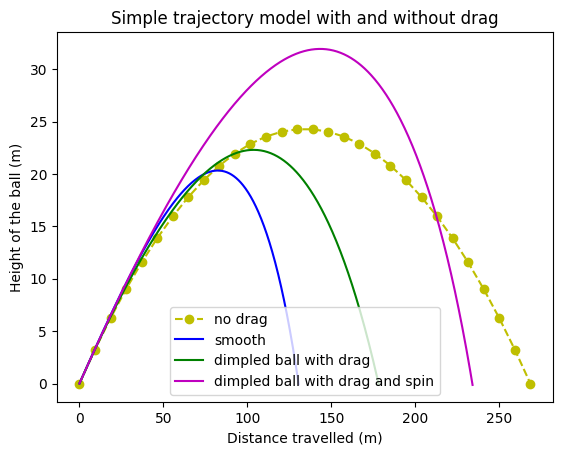

Distance travelled by ball with no drag : 268.52 m
dragTrajectory smooth : 130.54 m
dragTrajectory dimpled : 178.23 m
liftTrajectory dimpled with spin : 234.10 m 256.02 yards
liftTrajectory dimpled with back spin : 233.58 m 255.45 yards
calc_golf_carry_distance 293.63 meters.
calculate_ball_speed 64.16 meters per second.
calculate_golf_ball_distance: 268.52 m
calculate_golf_ball_distance_advanced: -281.58 m.
calculate_golf_ball_distance_with_spin_axis: 264.70 m
calculate_golf_ball_distance_with_launch_direction: 224.32 m.
calculate_side_carry: 12.29 meters 13.44 meters


In [118]:
print_detail(143.5/MPS_TO_MPH, 19.9, 2896,9.4,7.8,235.2/METERS_TO_YARDS)

In [ ]:
# Example usage
distance_yards = 278.6977573904179  # yards
launch_angle = 45  # degrees

ball_speed = calculate_ball_speed(distance_yards, launch_angle)
print(f"The ball speed is {ball_speed:.2f} meters per second.")
# Convert to MPH
ball_speed_mph = ball_speed * MPS_TO_MPH
print(f"The ball speed is {ball_speed_mph:.2f} MPH.")

The ball speed is 50.00 meters per second.
The ball speed is 111.85 MPH.


# Misc

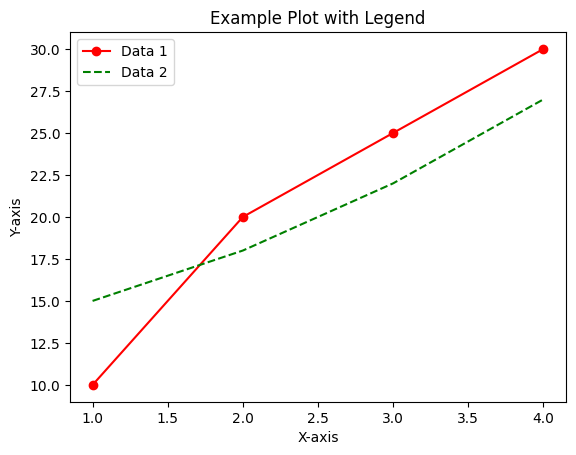

In [ ]:
import matplotlib.pyplot as plt

# Example data
x = [1, 2, 3, 4]
y1 = [10, 20, 25, 30]
y2 = [15, 18, 22, 27]

# Plot with labels
plt.plot(x, y1, 'ro-', label='Data 1')  # Red circles with solid line
plt.plot(x, y2, 'g--', label='Data 2')  # Green dashed line

# Add legend
plt.legend()

# Add titles and labels
plt.title('Example Plot with Legend')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Display the plot
plt.show()

In [ ]:
# https://www.mycompiler.io/view/3Ta6UVuc0pY
# Given values
ball_speed_mph=142
launch_angle=18.9
v0 = ball_speed_mph/MPS_TO_MPH
# v0 = 48.2  # m/s
# theta = 24.2  # degrees
theta = launch_angle
m = 0.04593  # kg
A = 0.0043  # m^2
Cd = 0.3
Cl = 0.4
g = 9.8  # m/s^2
rho = 1.225  # kg/m^3 (standard air density at sea level)

# Convert angle to radians
theta_rad = math.radians(theta)

# Calculate D
D = (v0**2 * math.sin(2 * theta_rad)) / g + (2 * v0**2 / g) * (m / (rho * A * Cd))**0.5 * math.atan(math.sin(theta_rad) / (math.cos(theta_rad) + (2 * v0 / g) * (m / (rho * A * Cl))**0.5))

print(f"The total distance traveled by the golf ball is approximately {D:.2f} meters.")
# Convert distance from meters to yards
distance_yards = D * 1.09361
print(f"The total distance traveled by the golf ball is approximately {distance_yards:.2f} yards.")

The total distance traveled by the golf ball is approximately 275.40 meters.
The total distance traveled by the golf ball is approximately 301.18 yards.


In [ ]:
# Example usage
elevation_ft = 1200  # feet
temperature_c = 15  # degrees Celsius

air_density = calculate_air_density(elevation_ft, temperature_c)
print(f"The air density at {elevation_ft} feet is {air_density:.4f} kg/m^3.")

# Example usage

air_density = 1.225  # kg/m^3 at sea level and standard conditions

# temp_fahrenheit = 70  # degrees Fahrenheit
# temp_celsius = (temp_fahrenheit - 32) * 5/9
temp_celsius = 20  # degrees Celsius
temp_fahrenheit = (temp_celsius * 9/5) + 32
print("Temperature in Celsius: ", temp_celsius)


ball_speed_mph = 142  # miles per hour
ball_speed = ball_speed_mph / MPS_TO_MPH  # Convert to meters per second
launch_angle = 18.9  # degrees
spin_rate_rpm = 1088  # RPM (not used in this simplified calculation)

spin_axis=5.0 # degress absolute
launch_direction=4.6 # degrees absolute

run_test(142,18.9,1088,4.6,5.0)
# print a line 80 dashes
print("-"*80)
print("This is where it doesn't make sense...need some adjustments")
run_test(138,17.1,12157,6.4,3.3)


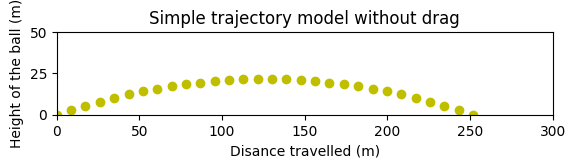

The ball travelled  251.76399997964091 m
Vox:  60.05709628041495
Voy:  20.562139969841486
Distance meters:  251.85000380356973


In [ ]:
# Example usage

ball_speed_mph = 142  # miles per hour
ball_speed = ball_speed_mph / MPS_TO_MPH  # Convert to meters per second
launch_angle = 18.9  # degrees
spin_rate_rpm = 1088  # RPM (not used in this simplified calculation)

initial_velocity = ball_speed
# launch_angle = 15

x_values,y_values = simpleTrajectory(initial_velocity, launch_angle)
# y_values = simpleTrajectory(initial_velocity, launch_angle)[1]


pyplot.plot(x_values, y_values, 'yo')
pyplot.xlim(0,300)
pyplot.ylim(0,50)
pyplot.gca().set_aspect('equal', adjustable='box')

pyplot.xlabel('Disance travelled (m)')
pyplot.ylabel('Height of the ball (m)')
pyplot.title('Simple trajectory model without drag')
pyplot.show()

print("The ball travelled ", x_values[-1], "m")
Vo=math.radians(launch_angle)
Vox=initial_velocity*math.cos(Vo)
print("Vox: ", Vox)

Voy=initial_velocity*math.sin(Vo)
print("Voy: ", Voy)

distance_meters = (initial_velocity ** 2) * math.sin(2 * Vo) / GRAVITATIONAL_ACCELERATION
print("Distance meters: ", distance_meters)


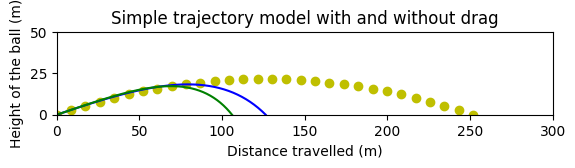

Distance travelled by ball with no drag : 251.76399997964091 m
Distance travelled by smooth ball with drag : 126.35029486334444 m
Distance travelled by dimpled ball with drag : 106.08313530505126 m


In [ ]:
# Ball with drag
# initial_velocity = 40
# launch_angle = 15
CD_smooth = 0.45
CD_dimpled = 0.2

x_values,y_values = simpleTrajectory(initial_velocity, launch_angle)

x_values_drag_smooth,y_values_drag_smooth,_ = dragTrajectory(initial_velocity, launch_angle, CD_smooth)


x_values_drag_dimpled,y_values_drag_dimpled,_ = dragTrajectory(initial_velocity, launch_angle, CD_dimpled)

pyplot.xlim(0,300)
pyplot.ylim(0,50)
pyplot.gca().set_aspect('equal', adjustable='box')
pyplot.plot(x_values, y_values, 'yo')
pyplot.plot(x_values_drag_smooth, y_values_drag_smooth, 'b')
pyplot.plot(x_values_drag_dimpled, y_values_drag_dimpled, 'g')

pyplot.xlabel('Distance travelled (m)')
pyplot.ylabel('Height of the ball (m)')
pyplot.title('Simple trajectory model with and without drag')
pyplot.show()

print("Distance travelled by ball with no drag :", x_values[-1], "m")
print("Distance travelled by smooth ball with drag :", x_values_drag_smooth[-1], "m")
print("Distance travelled by dimpled ball with drag :", x_values_drag_dimpled[-1], "m")

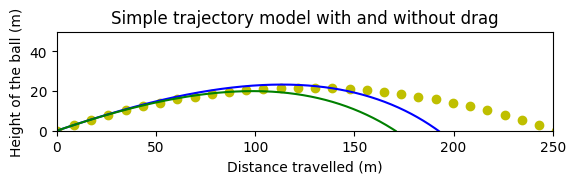

Distance travelled by ball with no drag : 251.76399997964091 m
Distance travelled by dimpled ball with drag : 170.80387335964636 m
Distance travelled by dimpled ball with drag and lift : 192.5459034664746 m


In [ ]:
# With and without drag
# initial_velocity = 40
# launch_angle = 15
# spin = 3275
CD_dimpled = 0.2

x_values,y_values = simpleTrajectory(initial_velocity, launch_angle)
x_values_drag_dimpled,y_values_drag_dimpled,_ = dragTrajectory(initial_velocity, launch_angle, CD_dimpled)
x_values_lift_dimpled,y_values_lift_dimpled,_ = liftTrajectory(initial_velocity, launch_angle, CD_dimpled, spin_rate_rpm)

pyplot.xlim(0,250)
pyplot.ylim(0,50)
pyplot.gca().set_aspect('equal', adjustable='box')
pyplot.plot(x_values, y_values, 'yo')
pyplot.plot(x_values_lift_dimpled, y_values_lift_dimpled, 'b')
pyplot.plot(x_values_drag_dimpled, y_values_drag_dimpled, 'g')

pyplot.xlabel('Distance travelled (m)')
pyplot.ylabel('Height of the ball (m)')
pyplot.title('Simple trajectory model with and without drag')
pyplot.show()

print("Distance travelled by ball with no drag :", x_values[-1], "m")
print("Distance travelled by dimpled ball with drag :", x_values_drag_dimpled[-1], "m")
print("Distance travelled by dimpled ball with drag and lift :", x_values_lift_dimpled[-1], "m")

# Projectile Motion Examples
- https://community.ptc.com/sejnu66972/attachments/sejnu66972/PTCMathcad/80448/1/Golf_Ball_Paper_Final_draft%5B1%5D.pdf
 

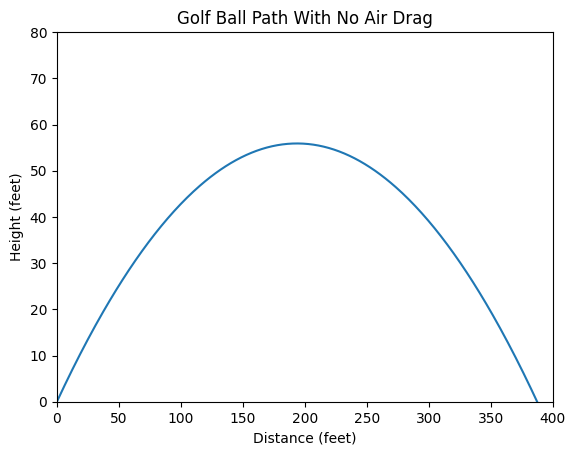

Max Distance = 387.6 ft
Max Height = 55.9 ft


In [1]:
import numpy as np
import matplotlib.pyplot as plt

i = 0
t = [0]
x = [0]
y = [0]
dt = 0.01
g = 32.2  # ft/s^2
theta = np.pi / 6  # 30 degrees
Vo = 120  # ft/s
Vx = Vo * np.cos(theta)
Vy = Vo * np.sin(theta)

# Test whether ball has hit the ground
# ****x and y position****
while y[i] > 0 or i == 0:
    i += 1
    t.append(t[i-1] + dt)
    x.append(Vx * t[i])
    y.append(Vy * t[i] - 0.5 * g * (t[i])**2)

# Plot Path of Ball
plt.plot(x, y)
plt.title('Golf Ball Path With No Air Drag')
plt.axis([0, 400, 0, 80])
plt.xlabel('Distance (feet)')
plt.ylabel('Height (feet)')
plt.show()

# Display the max height and distance
print(f'Max Distance = {max(x):.1f} ft')
print(f'Max Height = {max(y):.1f} ft')

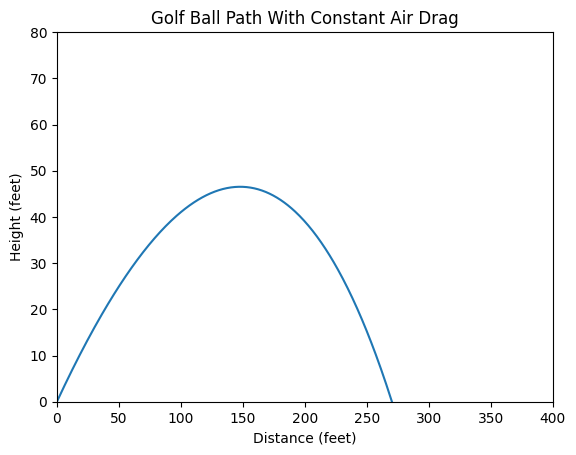

Max Distance = 270.3 ft
Max Height = 46.5 ft


In [2]:
# Constant Air Friction
import numpy as np
import matplotlib.pyplot as plt

i = 0
t = [0]
x = [0]
y = [0]
dt = 0.01
g = 32.2  # ft/s^2
k = -0.1665
theta = np.pi / 6  # 30 degrees
Vo = 120  # ft/s
Vx = Vo * np.cos(theta)
Vy = Vo * np.sin(theta)

# Test whether ball has hit the ground
# ****x and y position****
while y[i] > 0 or i == 0:
    i += 1
    t.append(t[i-1] + dt)
    x.append(624 - 624 * np.exp(k * t[i]))
    y.append(-1522 * np.exp(k * t[i]) + (g / k) * t[i] + 1522)

# Plot Path of Ball
plt.plot(x, y)
plt.title('Golf Ball Path With Constant Air Drag')
plt.axis([0, 400, 0, 80])
plt.xlabel('Distance (feet)')
plt.ylabel('Height (feet)')
plt.show()

# Display the max height and distance
print(f'Max Distance = {max(x):.1f} ft')
print(f'Max Height = {max(y):.1f} ft')

Max Distance with non-constant drag = 280.10 ft
Max Height with non-constant drag = 48.76 ft


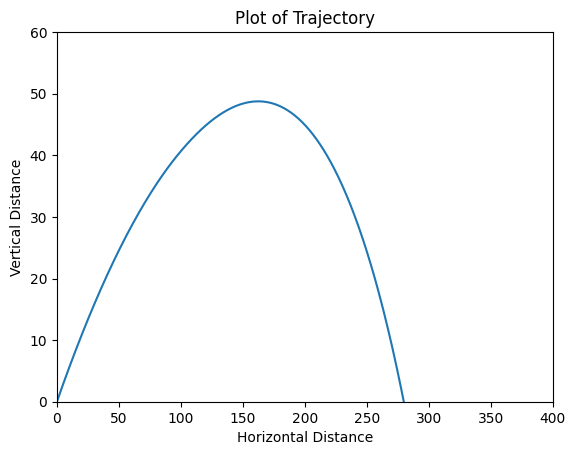

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def friction(t, y):
    # Define constants and variables
    g = 32.2  # Gravity constant (ft/s^2)
    w = 1.5 / 16  # Golf ball weight (lb)
    d = 1.75 / 12  # Golf ball diameter (ft)
    mu = 0.375 * 10**(-6)  # Viscosity of air (lb-sec/ft)
    m = w / g  # Golf ball mass (slugs)
    tau = m / (3 * mu * np.pi * d)  # Time constant (sec)
    p = 0.002378  # Air density (slugs/ft^3)
    
    Reu = (p * d * y[2]) / mu
    Rev = (p * d * y[3]) / mu
    
    # Calculate drag as a function of Reynolds number
    # which is a function of velocity
    if Reu > 90000:  # When Re is > 90,000, the drag constant is 0.1
        Cdu = 0.1
    else:  # When Re is <= 90,000, the drag constant is 0.4
        Cdu = 0.4
    
    if Rev > 90000:  # When Re is > 90,000, the drag constant is 0.1
        Cdv = 0.1
    else:  # When Re is <= 90,000, the drag constant is 0.4
        Cdv = 0.4
    
    # State matrix of [x, y, u, v]
    dydt = [y[2], y[3], (-Cdu * Reu * y[2]) / (24 * tau), ((Cdv * Rev * y[3]) / (24 * tau)) - g]
    return dydt

# Define constants and variables
i = 0  # Index
Cdh = 0.4  # Drag Coefficient for Reynolds Number <= 90000
Cdl = 0.1  # Drag Coefficient for Reynolds Number > 90000
g = 32.2  # Definition of gravity (ft/s^2)
dt = 0.01  # Differential time step definition (s)
w = 1.5 / 16  # Golf ball weight (lb)
d = 1.75 / 12  # Golf ball diameter (ft)
p = 0.002378  # Air density (slugs/ft^3)
mu = 0.375 * 10**(-6)  # Viscosity of air (lb-sec/ft)
m = w / g  # Golf ball mass (slugs)
tau = m / (3 * mu * np.pi * d)  # Time constant (sec)
y1max = 0  # Maximum height
x1max = 0  # Maximum distance

# Define arrays
x1 = [np.finfo(float).eps]  # Distance array
y1 = [np.finfo(float).eps]  # Height array
u1 = [103.9230]  # Horizontal velocity component array
v1 = [60]  # Vertical velocity component array
t = [np.finfo(float).eps]  # Time array (sec)

# Calculations
while y1[i] >= np.finfo(float).eps:
    i += 1  # Increment the counter
    Reu = (p * d * u1[i-1]) / mu  # Define Re in the x-direction
    Rev = (p * d * v1[i-1]) / mu  # Define Re in the y-direction
    
    # The calculation of velocity
    if Reu > 90000:  # When Re is > 90,000, the drag constant is 0.1
        u1.append((u1[i-1] * (48 * tau - Cdl * Reu * dt)) / (48 * tau + Cdl * Reu * dt))
    else:  # When Re is <= 90,000, the drag constant is 0.4
        u1.append((u1[i-1] * (48 * tau - Cdh * Reu * dt)) / (48 * tau + Cdh * Reu * dt))
    
    if Rev > 90000:  # When Re is > 90,000, the drag constant is 0.1
        v1.append((v1[i-1] * (48 * tau - Cdl * Rev * dt) - 48 * tau * g * dt) / (48 * tau + Cdl * Rev * dt))
    else:  # When Re is <= 90,000, the drag constant is 0.4
        v1.append((v1[i-1] * (48 * tau - Cdh * Rev * dt) - 48 * tau * g * dt) / (48 * tau + Cdh * Rev * dt))
    
    # The calculation of position
    x1.append(x1[i-1] + (dt / 2) * (u1[i-1] + u1[i]))  # Defines x-position
    y1.append(y1[i-1] + (dt / 2) * (v1[i-1] + v1[i]))  # Defines y-position
    t.append(i * dt)  # Increments the time
    
    # Find the maximum distance and height
    if y1[i] > y1max:
        y1max = y1[i]
    if x1[i] > x1max:
        x1max = x1[i]

# Print the results
print(f'Max Distance with non-constant drag = {x1max:.2f} ft')
print(f'Max Height with non-constant drag = {y1max:.2f} ft')

# Plot the results
plt.plot(x1, y1)
plt.title('Plot of Trajectory')
plt.axis([0, 400, 0, 60])
plt.xlabel('Horizontal Distance')
plt.ylabel('Vertical Distance')
plt.show()

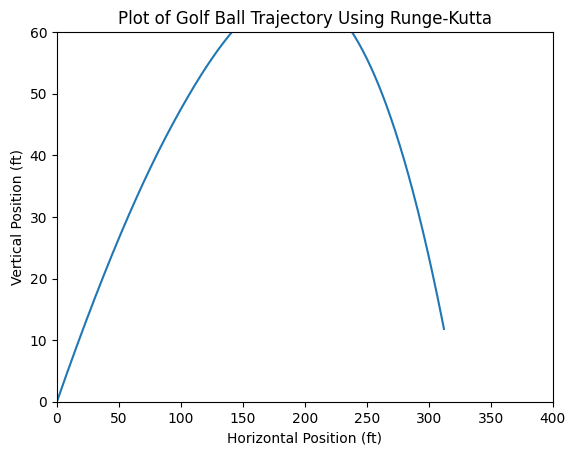

Max Distance with non-constant drag = 1.04 ft
Max Height with non-constant drag = 0.60 ft


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the friction function
def friction(t, y):
    g = 32.2  # Gravity constant (ft/s^2)
    w = 1.5 / 16  # Golf ball weight (lb)
    d = 1.75 / 12  # Golf ball diameter (ft)
    mu = 0.375 * 10**(-6)  # Viscosity of air (lb-sec/ft)
    m = w / g  # Golf ball mass (slugs)
    tau = m / (3 * mu * np.pi * d)  # Time constant (sec)
    p = 0.002378  # Air density (slugs/ft^3)
    
    Reu = (p * d * y[2]) / mu
    Rev = (p * d * y[3]) / mu
    
    if Reu > 90000:
        Cdu = 0.1
    else:
        Cdu = 0.4
    
    if Rev > 90000:
        Cdv = 0.1
    else:
        Cdv = 0.4
    
    dydt = [y[2], y[3], (-Cdu * Reu * y[2]) / (24 * tau), ((Cdv * Rev * y[3]) / (24 * tau)) - g]
    return dydt

# Time span and initial conditions
tspan = np.arange(0, 4, 0.01)
y0 = [0, 0, 103.923, 60]

# Solve the differential equations using solve_ivp
sol = solve_ivp(friction, [tspan[0], tspan[-1]], y0, t_eval=tspan, method='RK45')

# Extract the solution
t = sol.t
y = sol.y.T

# Test whether or not the golf ball has hit the ground
ymax = np.finfo(float).eps
xmax = np.finfo(float).eps

for i in range(len(t)):
    s = y[i, 1]
    if y[i, 1] > ymax:
        ymax = y[i, 1]
    if y[i, 0] > xmax:
        xmax = y[i, 0]
    if s > np.finfo(float).eps:
        # Plot the trajectory of the golf ball
        plt.plot(y[:, 0], y[:, 1])
        plt.title('Plot of Golf Ball Trajectory Using Runge-Kutta')
        plt.axis([0, 400, 0, 60])
        plt.xlabel('Horizontal Position (ft)')
        plt.ylabel('Vertical Position (ft)')
        plt.show()
        break

# Print the results
print(f'Max Distance with non-constant drag = {xmax:.2f} ft')
print(f'Max Height with non-constant drag = {ymax:.2f} ft')

# MLM2Pro GSPro Connector
- https://github.com/springbok/MLM2PRO-GSPro-Connector
- Screen scrapes data from the UI in practice mode via a window on the AirPlay (iPhone)
- Uses ROI (Regions of Interest) to "screen scrape" the data
- Converts MPH to MPS (meters per second) with 2.2375 (although the approx is 2.23693629)
    - Ball speed: 150 mph (=150/10.0*2.2375) 33.5625? but this is 67.056 mps
- [GSPro Open API](https://gsprogolf.com/GSProConnectV1.html) 
```json
{
    "DeviceID": "GSPro LM 1.1",  			//required - unqiue per launch monitor / prooject type
    "Units": "Yards",						//default yards
    "ShotNumber": 13,						//required - auto increment from LM
    "APIversion": "1",						//required - "1" is current version
    "BallData": {		
        "Speed": 147.5,						//required
        "SpinAxis": -13.2,					//required
        "TotalSpin": 3250.0,				//required
        "BackSpin": 2500.0,					//only required if total spin is not sent
        "SideSpin": -800.0,					//only required if total spin is not sent
        "HLA": 2.3,							//required
        "VLA": 14.3,						//required
        "CarryDistance": 256.5				//optional
    },
    "ClubData": {							
        "Speed": 0.0,
        "AngleOfAttack": 0.0,
        "FaceToTarget": 0.0,
        "Lie": 0.0,
        "Loft": 0.0,
        "Path": 0.0,
        "SpeedAtImpact": 0.0,
        "VerticalFaceImpact": 0.0,
        "HorizontalFaceImpact": 0.0,
        "ClosureRate": 0.0
    },
    "ShotDataOptions": {
        "ContainsBallData": true,			//required
        "ContainsClubData": false,			//required
        "LaunchMonitorIsReady": true, 		//not required
        "LaunchMonitorBallDetected": true, 	//not required
        "IsHeartBeat": false 				//not required
    }
}
```


In [133]:
# Information GSPro needs
ballData = {    
    "Speed": 147.5,						# required
    "SpinAxis": -13.2,					# required
    "TotalSpin": 1088.0,				# required
    "BackSpin": 2500.0,					# only required if total spin is not sent
    "SideSpin": -800.0,					# only required if total spin is not sent
    "HLA": 2.3,							# required
    "VLA": 14.3,						# required
    "CarryDistance": 0,			# optional
}

ballData.update({"Speed": 142/2.2375})
ballData.update({"SpinAxis": -5.0})
ballData.update({"VLA": 18.9})
ballData.update({"HLA": 4.6})

ball_speed=142/2.2375 #mph
speed=142/10.0*2.2375 #m/s
club_speed=101.2/MPS_TO_MPH
total_spin=1088 #rpm
spin_axis=-5.0 #degrees
vla=18.9 #vertical launch angle
hla=4.6 #horizontal launch angle
# smash_factor_mlm=1.4
# smash_factor=math.ceil((ball_speed / club_speed)*10)/10
# print("Smash factor: ", smash_factor, "MLM: ", smash_factor_mlm)

print("radians: ", math.radians(ballData["SpinAxis"]))
back_spin=round(ballData["TotalSpin"]*math.cos(math.radians(ballData["SpinAxis"])))
ballData.update({"BackSpin": back_spin})
print("Back spin: ", back_spin)

side_spin=round(ballData["TotalSpin"]*math.sin(math.radians(ballData["SpinAxis"])))
ballData.update({"SideSpin": side_spin})
print("Side spin: ", side_spin)


# Calculate the horizontal velocity component
# Vox = ball_speed_mps * math.cos(math.radians(vla))
# print("Vox: ", Vox)
print(ballData)


radians:  -0.08726646259971647
Back spin:  1084
Side spin:  -95
{'Speed': 63.46368715083799, 'SpinAxis': -5.0, 'TotalSpin': 1088.0, 'BackSpin': 1084, 'SideSpin': -95, 'HLA': 4.6, 'VLA': 18.9, 'CarryDistance': 0}
